In [3]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/ADEME_dpe-v2-tertiaire-2.csv")

In [5]:
data.shape

(10000, 63)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   N°DPE                              10000 non-null  object 
 1   Date_réception_DPE                 10000 non-null  object 
 2   Date_établissement_DPE             10000 non-null  object 
 3   Date_visite_diagnostiqueur         10000 non-null  object 
 4   Modèle_DPE                         10000 non-null  object 
 5   N°_DPE_remplacé                    582 non-null    object 
 6   Date_fin_validité_DPE              10000 non-null  object 
 7   Version_DPE                        10000 non-null  float64
 8   N°_DPE_immeuble_associé            26 non-null     object 
 9   Méthode_du_DPE                     9585 non-null   object 
 10  N°_immatriculation_copropriété     34 non-null     object 
 11  Invariant_fiscal_logement          60 non-null     obje

In [25]:
i = 0
df = data.copy()
for nom_colonne in data.columns:
    if df[~df[nom_colonne].isna()].shape[0] > 5000:
        i= i+1

print(i)

41


In [29]:
df[df["Emission_GES_kgCO2/m²/an"].isna()].sample(10)

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Méthode_du_DPE,...,Type_énergie_n°2,Type_usage_énergie_n°2,Frais_annuel_énergie_n°2,Année_relève_conso_énergie_n°2,Conso_é_finale_énergie_n°3,Conso_é_primaire_énergie_n°3,Type_énergie_n°3,Type_usage_énergie_n°3,Frais_annuel_énergie_n°3,Année_relève_conso_énergie_n°3
5916,2334T1896951Q,2023-06-08,2023-06-08,2023-06-07,DPE 2006 tertiaire et ERP,NaN,2033-06-07,2.2,NaN,dpe tertiaire vierge dans un bâtiment de logement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8584,2213T2481021A,2022-10-22,2022-10-13,2022-10-13,DPE 2006 tertiaire et ERP,NaN,2032-10-12,2.2,NaN,dpe tertiaire vierge dans un bâtiment de logement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3471,2226T0043567H,2022-01-10,2022-01-10,2022-01-06,DPE 2006 tertiaire et ERP,NaN,2032-01-09,2.0,NaN,dpe tertiaire vierge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8461,2384T1265119I,2023-04-17,2023-04-17,2023-04-14,DPE 2006 tertiaire et ERP,NaN,2033-04-16,2.2,NaN,dpe tertiaire vierge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6764,2242T2568402Y,2022-10-31,2022-10-31,2022-10-21,DPE 2006 tertiaire et ERP,NaN,2032-10-30,2.2,NaN,dpe tertiaire vierge dans un bâtiment de logement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6326,2213T1854743K,2022-08-16,2022-08-16,2022-08-16,DPE 2006 tertiaire et ERP,NaN,2032-08-15,2.1,NaN,dpe tertiaire vierge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6919,2234T1464776M,2022-06-28,2022-06-28,2022-06-28,DPE 2006 tertiaire et ERP,NaN,2032-06-27,2.1,NaN,dpe tertiaire vierge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,2392T0692363O,2023-03-02,2023-03-02,2023-03-02,DPE 2006 tertiaire et ERP,NaN,2033-03-01,2.2,NaN,dpe tertiaire vierge dans un bâtiment de logement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9969,2256T2129592E,2022-09-17,2022-09-17,2022-09-16,DPE 2006 tertiaire et ERP,NaN,2032-09-16,2.2,NaN,dpe tertiaire vierge dans un bâtiment de logement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4224,2233T0928745W,2022-05-01,2022-05-01,2022-04-27,DPE 2006 tertiaire et ERP,NaN,2032-04-30,2.1,NaN,dpe tertiaire vierge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df["Nombre_occupant"].describe()

count    9.455000e+03
mean     3.122633e+04
std      3.011636e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      6.850000e+01
max      2.928417e+08
Name: Nombre_occupant, dtype: float64

In [45]:
col = 'Emission_GES_kgCO2/m²/an'
df = df[~df[col].isna()].copy()
df.reset_index(inplace = True, drop = True)

In [47]:
from scipy import stats
df['z_emissions'] = stats.zscore(df[col])

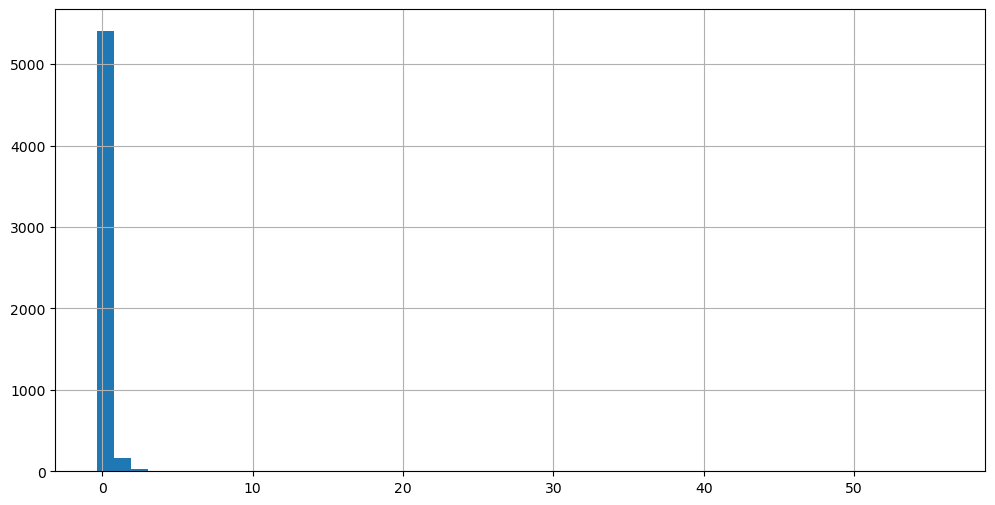

In [66]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.hist(df['z_emissions'],50)
plt.grid()
fig.show()

In [76]:
print("Emisssion de gas aberrantes: ", df[df['z_emissions']>3].shape[0])

Emisssion de gas aberrantes:  11


In [74]:
import numpy as np
print("Max emisssion de gas : ", np.max(df[df['z_emissions']<2][col]))

Max emisssion de gas :  127.0


In [82]:
iqr = np.quantile(df[col], q=[0.25, 0.75])
limite_basse = iqr[0] - 1.5*(iqr[1] - iqr[0])
limite_haute = iqr[1] + 1.5*(iqr[1] - iqr[0])

print("Limite basse : ", limite_basse)
print("Limite haute : ", limite_haute)

Limite basse :  -20.950000000000003
Limite haute :  44.25


In [80]:
print("Emisssion de gas aberrantes: ", df[df[col]>limite_haute].shape[0])

Emisssion de gas aberrantes:  488


In [85]:
pd.cut(df[col], 10).value_counts()

Emission_GES_kgCO2/m²/an
(-3.126, 312.59]      5604
(312.59, 625.18]         1
(1562.95, 1875.54]       1
(1250.36, 1562.95]       1
(2813.31, 3125.9]        1
(937.77, 1250.36]        0
(625.18, 937.77]         0
(1875.54, 2188.13]       0
(2188.13, 2500.72]       0
(2500.72, 2813.31]       0
Name: count, dtype: int64

In [89]:
pd.qcut(df[col], 10).value_counts()

Emission_GES_kgCO2/m²/an
(-0.001, 0.1]      642
(4.3, 6.0]         574
(6.0, 8.0]         567
(40.43, 3125.9]    561
(15.8, 24.5]       560
(2.7, 4.3]         560
(10.7, 15.8]       560
(24.5, 40.43]      558
(8.0, 10.7]        528
(0.1, 2.7]         498
Name: count, dtype: int64

In [101]:
df['Secteur_activité'].value_counts()

Secteur_activité
autres tertiaires non ERP                                                                                             1364
M : Magasins de vente, centres commerciaux                                                                            1191
W : Administrations, banques, bureaux                                                                                  799
locaux d'entreprise (bureaux)                                                                                          664
N : Restaurants et débits de boisson                                                                                   416
J : Structures d’accueil pour personnes âgées ou personnes handicapées                                                 388
U : Établissements de soins                                                                                            246
GHW : Bureaux                                                                                                          145

L'encodage binaire rajouterait 5 colonnes au dataset.
L'encodage binaire crée P nouvelles variables avec P tel que 2^P > N
comme 32 = 2^5 > 24, l'encodage binaire rajouterait 5 nouvelles variables.